# Malaria Data Science Project
by Mervin Keith Cuadera, Jacob Speigel, and Lane Fitzsimmons

## Introduction

Malaria still poses a major impact on world health, with an estimated 229 million clinical cases occurring in 2019. An important component in malaria transmission is temperature, as both the Plasmodium parasite and the main mosquito vector, Anopheles species mosquitoes, are sensitive to it. Although the majority of malaria cases occur in sub-Saharan Africa and in parts of Asia, climate change and increased globalization may cause this disease to spread further. To reduce the future malaria burden, predicting which countries are at risk for developing malaria is essential in proactively providing public health support. Using mean global surface temperature and trends in malaria cases, it may be possible to create a simple risk model for the disease.

## Data Description

#### Motivation

**Why were these datasets created?**

The datasets on malaria incidences, cases and deaths were created by the World Health Organization to better understand the threat of malaria in observed countries. Observations of trends in the data can assist in the WHO’s efforts to eradicate the disease. We combined these three datasets to observe trends in malaria incidence, case number and deaths by country and by year. These trends may reveal insights about the spread of the disease, and pinpoint areas where malaria incidence has declined to allow further investigation into these places. 

For the World Bank dataset, it was created to "identify effective public and private actions, set goals and targets, monitor progress and evaluate impacts."

The Earth surface temperature dataset, which was obtained in Kaggle, was created to understand the trends in global temperatures with respect to finding evidence for climate change. 

**Who created the datasets?**

The World Health Organization funded the dataset, which is an organization under the direction of the United Nations. The World Bank dataset was created by the World Bank, United Nations Population Division, and US Census Bureau. The Earth surface temperature dataset was compiled by Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. 

**Who funded the creation of the datasets?**

The WHO is funded largely by Member States and UN organizations. 
The World Bank is capitally funded by member countries/organizations. 
The Earth surface temperature data is fully funded through charitable contributions from unrestricted grants from donor organizations, as well as the U.S. Department of Energy.

#### Composition

**What are the observations (rows) and the attributes (columns)?**

The row represents malaria statistics and Gross Domestic Product per Capita adjusted for Purchase Power Parity (GDPpcPPP) per year and country. The attributes in the final dataset includes Year, Country, Incidence (the number of cases per 1,000 people), Deaths (confirmed deaths from malaria), confirmed cases, Region (using WHO Classification), and Global South (whether or not the country is a developing nation - Global North if it is developed).


**Does the dataset contain data that might be considered confidential (e.g., data that is protected by legal privilege or by doctor/patient confidentiality, data that includes the content of individuals’ non-public communications)?**

No, this data is publicly available. 

**Over what timeframe was the data collected?**

2000 to 2013

**Is any information missing from individual instances?**

An important piece of data missing from the observations is the population of the country at the time the observation was taken. It will therefore be more difficult to draw comparisons between the number of deaths in different countries per a set time period. This will be a limitation in our data analysis. There are certain years throughout where information was not collected, for example, Kenya 2006 - 2010. Because of this, there are some gaps in our graphs and analysis. 

#### Collection
**What processes might have influenced what data was observed and recorded and what was not?**

It was certainly difficult for the WHO to record malaria cases in developing countries as a lack of developed healthcare systems likely led to some cases going unreported. The data therefore represents the cases the WHO was able to record, which can still reveal relative trends assuming the WHO used standardized data collection methods.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

It is not explicitly stated whether people were involved in the data collection. The data was “reported” and “confirmed,” meaning that it was likely taken and compiled from existing healthcare systems.

#### Preprocessing/Cleaning:
**What preprocessing was done, and how did the data come to be in the form that you are using?**

The columns were taken from different datasets provided by the WHO on malaria incidence, reported confirmed cases and reported deaths. The column Global South was taken through web scraping this [Wikimedia page](https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification) . This data was converted into a DataFrame, and the DataFrames with the data from each source were combined into one DataFrame. This left us with our final dataset.

Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

1. [Malaria Cases](https://raw.githubusercontent.com/mcuadera/info2950_project/master/datasets/malaria_confirmed_cases.csv)
2. [Malaria Deaths](https://raw.githubusercontent.com/mcuadera/info2950_project/master/datasets/malaria_deaths.csv)
3. [Malaria Incidence](https://raw.githubusercontent.com/mcuadera/info2950_project/master/datasets/malaria_incidence.csv)
4. [Country Regions](https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification)
5. [Population Data](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/master/datasets/population_data.csv)
6. [GDP per Capita PPP](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/gdppcppp_per_country.csv)
7. [Surface Temperature Data](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/temp_by_country.csv)

## Pre-registration Assignment

**Overview**

We “pre registered” two analyses of our data to ensure that we were not selectively choosing analyses that reveal statistically significant results. We did not know whether these analyses would yield interesting results before we performed them.

**Analysis 1: Multivariable Regression of Temperature, GDP and Malaria Incidence**

In phase 3, we committed to create a multivariable linear regression that predicts the incidence of malaria given temperature and GDP by country for the most recent year in our dataset. However, we realized that grouping by regions rather than by country may be more informative as malaria cases are probably more influenced by geography rather than country name. Temperature and GDP by year and country were not variables in the dataset we used for Phase II, but added those variables to the final dataset. This was to observe the resulting coefficient of the model and draw conclusions based on that. For instance, if the coefficient is large and positive, we could infer that temperature and GDP together correlate with a higher incidence of malaria in most countries. From the evidence gathered, we discuss in our analysis factors that are likely to impact malaria incidence worldwide, such as change in GDP and global warming.

**Analysis 2: K-Means Clustering**

We committed to perform a k-means clustering analysis to discover ways in which the countries in the dataset can be categorized. This involved trying different clusterings with different values of k. A significant result would be that countries with high, medium and low malaria incidence rates share common categoristics, such as region or temperature change. This analysis provided further insight as to what country characteristics may put countries at a higher risk for the spread of malaria.

#### Importing libraries to be used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
plt.rcParams["figure.figsize"] = (10, 5)

#### Loading curated dataset

In [2]:
curated_df_url = "https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/malaria_project_curated_data.csv"
malaria_df = pd.read_csv(curated_df_url, index_col=0, parse_dates=True)
malaria_df.head()

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature
Year,,,,,,,,,
2013-01-01,Afghanistan,9.01,24.0,39263.0,32269589.0,Asia & Pacific,Global South,2015.514962,16.533625
2012-01-01,Afghanistan,11.15,36.0,54840.0,31161376.0,Asia & Pacific,Global South,1914.774351,14.481583
2011-01-01,Afghanistan,18.87,40.0,77549.0,30117413.0,Asia & Pacific,Global South,1699.487997,15.518000
2010-01-01,Afghanistan,15.11,22.0,69397.0,29185507.0,Asia & Pacific,Global South,1710.575645,15.828667
2009-01-01,Afghanistan,14.77,32.0,64880.0,28394813.0,Asia & Pacific,Global South,1519.692548,15.257750


## Data Analysis

In [3]:
by_year = malaria_df.groupby('Year')
year_2013 = malaria_df.loc['2013-01-01']

We first grouped the dataset by year to so that we can determine the overall trends in global malaria over time, with respect to confirmed cases, incidence, and deaths. We suspected that the averages for these measures per year may have been skewed by certain countries or regions that may have a lot more cases than the rest of the world, so we also graphed the median deaths as a more accurate portrayal of the data's middle value. We also isolated the latest malaria data from our dataset.

##### Malaria cases over time

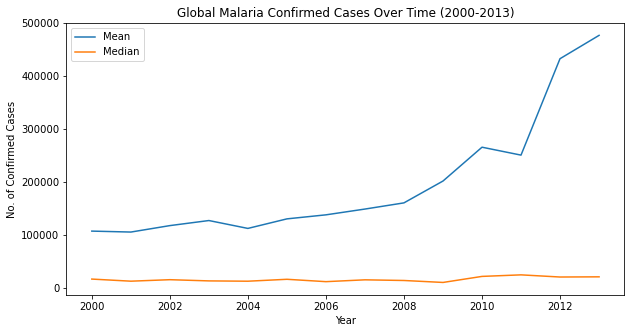

In [4]:
plt.plot(by_year['Confirmed Cases'].mean(), label='Mean')
plt.plot(by_year['Confirmed Cases'].median(), label='Median')
plt.title('Global Malaria Confirmed Cases Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('No. of Confirmed Cases')
plt.legend()
plt.show()

The graph shows that between 2000-2013, the average malaria cases throughout the world have increased. However, the median seems to be fairly constant. We zoomed into the median more because we thought that the line for the average was distorting the trends in median malaria cases.

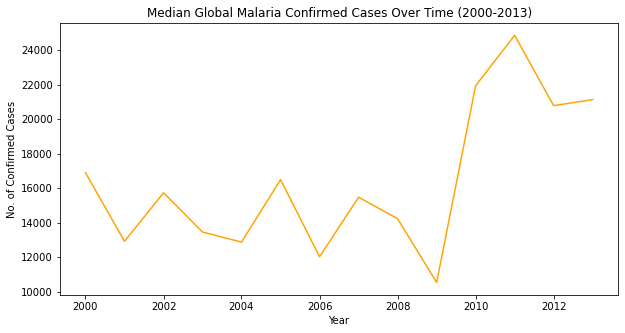

In [5]:
plt.plot(by_year['Confirmed Cases'].median(), color='orange')
plt.title('Median Global Malaria Confirmed Cases Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('No. of Confirmed Cases')
plt.show()

In this graph of media confirmed cases over time, there seems to be a cyclical peak of malaria cases. However, increases in median malaria cases jumped significantly in 2009. Following the patterns from previous years, after a peak in median confirmed cases, following years have reduced median confirmed cases. 

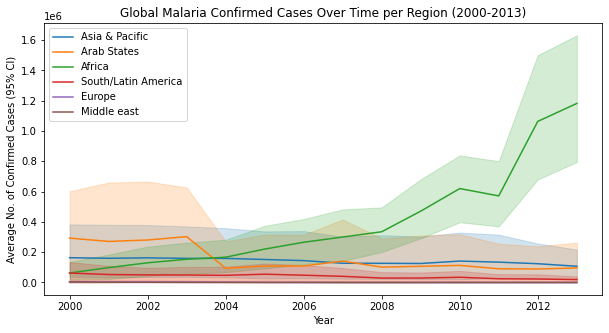

In [6]:
sns.lineplot(x='Year', y='Confirmed Cases', hue='Region', data=malaria_df)
plt.title('Global Malaria Confirmed Cases Over Time per Region (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average No. of Confirmed Cases (95% CI)')
plt.legend()
plt.show()

We see that the average malaria confirmed cases in Africa have increased over time, while other regions either have lowered average cases or have stabilized. We created a separate graph excluding Africa so we can better see the trends in average malaria confirmed cases in the other regions.

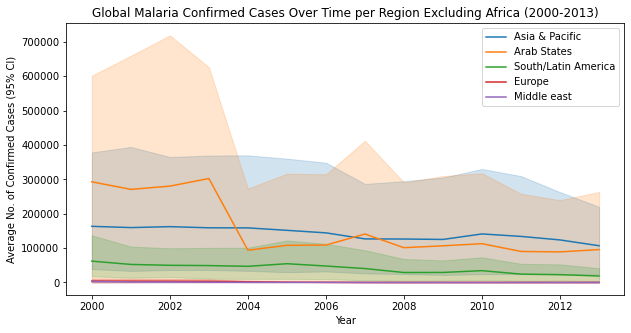

In [7]:
sns.lineplot(x='Year', y='Confirmed Cases', hue='Region', data=malaria_df[malaria_df['Region']!='Africa'])
plt.title('Global Malaria Confirmed Cases Over Time per Region Excluding Africa (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average No. of Confirmed Cases (95% CI)')
plt.legend()
plt.show()

Indeed, in the other regions, there have been a decrease in average malaria confirmed cases such as in the Arab States, Asia & Pacific, and South/Latin America. However, average number of malaria cases haven't changed significantly overall between 2000-2013. Europe and the Middle East seems to have the lowest number of average confirmed cases over time. 

##### Malaria incidence over time

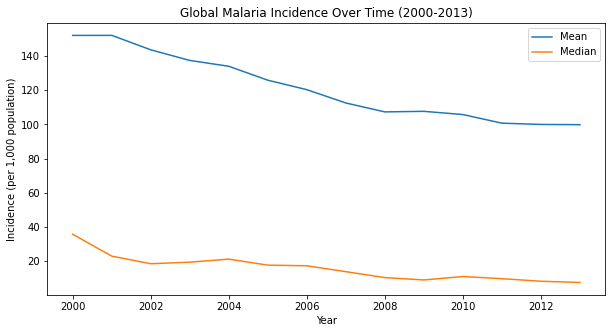

In [25]:
plt.plot(by_year['Incidence'].mean(), label='Mean')
plt.plot(by_year['Incidence'].median(), label='Median')
plt.title('Global Malaria Incidence Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Incidence (per 1,000 population)')
plt.legend()
plt.show()

Unlike the confirmed cases, the incidence of global malaria has decreased over time. However, starting in 2008, it seems like the global incidence has stagnated.

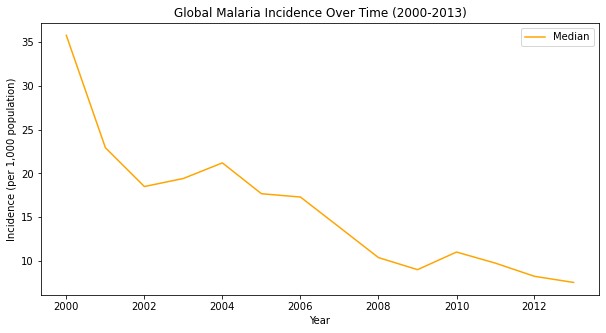

In [32]:
plt.plot(by_year['Incidence'].median(), color='orange')
plt.title('Median Global Malaria Incidence Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Incidence (per 1,000 population)')
plt.show()

Looking at the median incidence, it suggests a significant reduction in incidence over time. Since 2008, the median malaria incidence haven't changed much, but still much better than compared to previous years. 

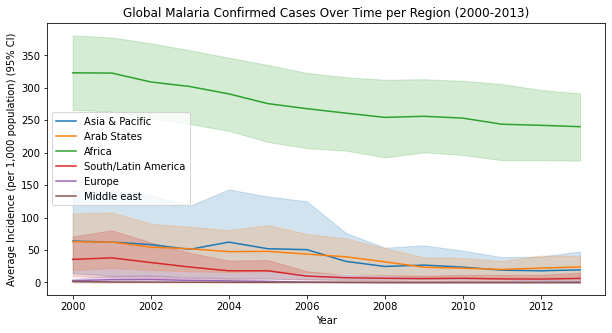

In [9]:
sns.lineplot(x='Year', y='Incidence', hue='Region', data=malaria_df)
plt.title('Global Malaria Incidence Over Time per Region (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average Incidence (per 1,000 population) (95% CI)')
plt.legend()
plt.show()

We see that the average malaria incidence overall have decreased over time. Africa still has the largest incidence compared to other regions, while other regions seem to be close in terms of average incidence. In 2013, the average malaria incidence was less than 50 for all other regions. We created a separate graph excluding Africa so we can better see the trends in average malaria incidence in the other regions.

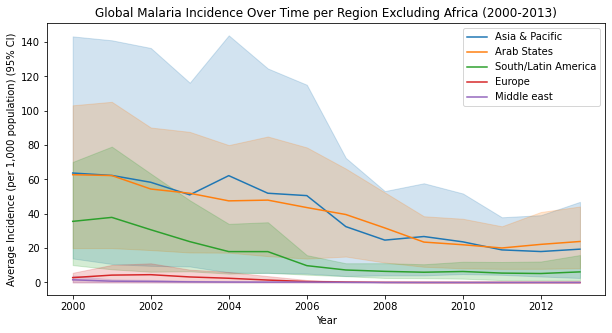

In [10]:
sns.lineplot(x='Year', y='Incidence', hue='Region', data=malaria_df[malaria_df['Region']!='Africa'])
plt.title('Global Malaria Incidence Over Time per Region Excluding Africa (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average Incidence (per 1,000 population) (95% CI)')
plt.legend()
plt.show()

Indeed, in the other regions, there have been a decrease in average malaria incidence such as in the Arab States, Asia & Pacific, and South/Latin America. Asia & Pacific as well as the Arab States seem to have similar incidence over time. Europe and the Middle East seems to have the lowest number of average incidence over time, similar to trends in confirmed cases. 

##### Malaria deaths over time

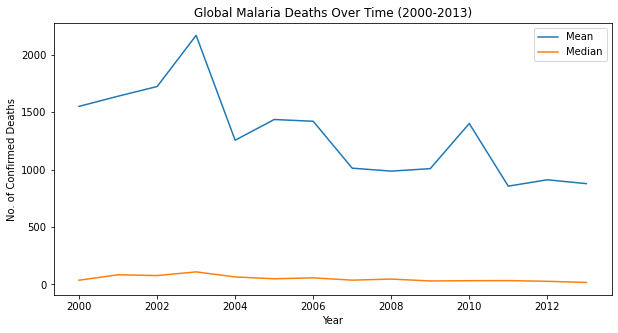

In [29]:
plt.plot(by_year['Deaths'].mean(), label='Mean')
plt.plot(by_year['Deaths'].median(), label='Median')
plt.title('Global Malaria Deaths Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('No. of Confirmed Deaths')
plt.legend()
plt.show()

We found that overall confirmed deaths due to malaria has decreased over time. Apart from the peak in 2010, average malaria deaths have stagnated around 1,000 starting in 2007. The median deaths seems to be the same overall, but we suspected it could be due to the inclusion of mean deaths in the graphs so we created a separate graph for it.

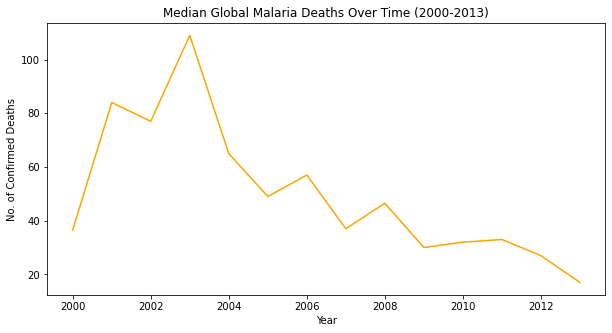

In [34]:
plt.plot(by_year['Deaths'].median(), color='orange')
plt.title('Median Global Malaria Deaths Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('No. of Confirmed Deaths')
plt.show()

We see that deaths due to malaria increased from 2000 through 2003, but then decreased after that. In the latest year of the dataset, the median number of confirmed deaths was less than 20. 

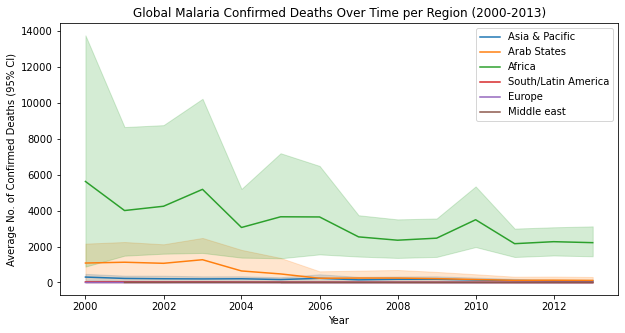

In [11]:
sns.lineplot(x='Year', y='Deaths', hue='Region', data=malaria_df)
plt.title('Global Malaria Confirmed Deaths Over Time per Region (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average No. of Confirmed Deaths (95% CI)')
plt.legend()
plt.show()

In each region, deaths have decreased over time. Africa still has the most number of average deaths. Average number of confirmed deaths in other regions seems negligible compared to Africa. However, we zoomed into the data to get a better picture of what is occuring in other regions.

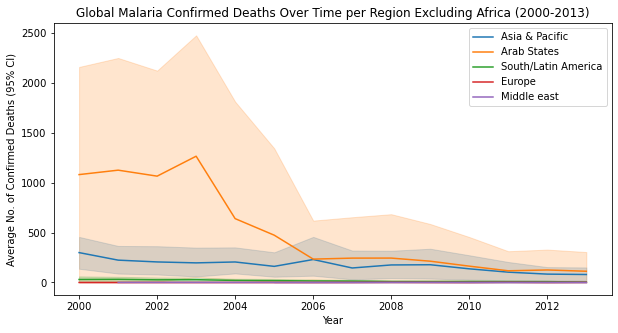

In [12]:
sns.lineplot(x='Year', y='Deaths', hue='Region', data=malaria_df[malaria_df['Region']!='Africa'])
plt.title('Global Malaria Confirmed Deaths Over Time per Region Excluding Africa (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average No. of Confirmed Deaths (95% CI)')
plt.legend()
plt.show()

In the other regions, we saw that there have been a decrease in average malaria confirmed cases such as in the Arab States and Asia & Pacific. For other regions, the average numer of deaths is miniscule, with the other regions having fairly small number of deaths due to malaria.

##### Distribution of Malaria Incidence

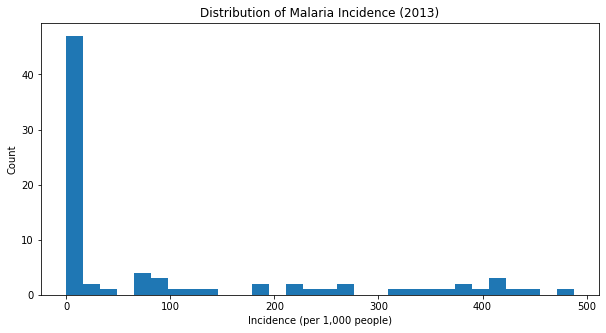

In [62]:
plt.hist(year_2013['Incidence'], bins=30)
plt.title('Distribution of Malaria Incidence (2013)')
plt.xlabel('Incidence (per 1,000 people)')
plt.ylabel('Count')
plt.show()

We graphed the distribution of incidence in 2013 to see how incidence is distributed throughout countries. We see that a significant majority of countries in the world have low incidence (close to zero in this graph). However, there are wide amount of incidence in some of the countries.

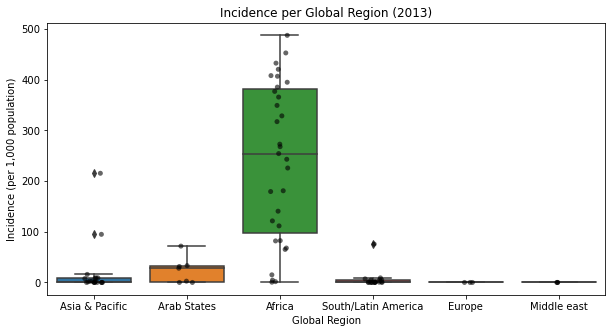

In [59]:
sns.boxplot(x='Region', y='Incidence', data=year_2013)
sns.stripplot(x='Region', y='Incidence', data=year_2013, color='black', alpha=0.6)
plt.title('Incidence per Global Region (2013)')
plt.xlabel('Global Region')
plt.ylabel('Incidence (per 1,000 population)')
plt.show()

We decided to explore the recent trends in malaria cases in the latest year available in the dataset. Unsurprisingly, Africa has the largest median incidence, but also the largest variation in incidence. The Arab States closely follows, and then Asia & Pacific. In Asia and Pacific, there seem to be two countries that have significantly higher incidence compared to the rest of the countries in this region. In South/Latin America, there is one country that seems to have significantly higher incidence compared to the rest of the countries in this region. Europe and Middle East have small malaria incidence. 

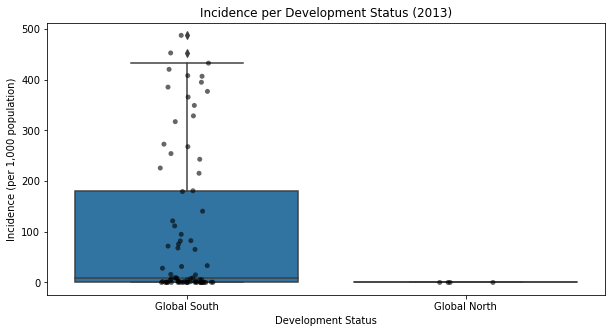

In [55]:
sns.boxplot(x='Global South', y='Incidence', data=year_2013)
sns.stripplot(x='Global South', y='Incidence', data=year_2013, color='black', alpha=0.6)
plt.title('Incidence per Development Status (2013)')
plt.xlabel('Development Status')
plt.ylabel('Incidence (per 1,000 population)')
plt.show()

Unsurprisingly, countries considered to be higher income (Global North) have lower incidence than lower income countries (Global South). It is worth noting that compared to Global South, there are very few countries included in the Global North. However, even countries in the Global South seem to have the same number of incidence as countries in the Global North, which could suggest that socioeconomic status of a country may not necessarily be indicative of malaria cases and that other variables are at play. 

##### Distribution of Malaria Deaths

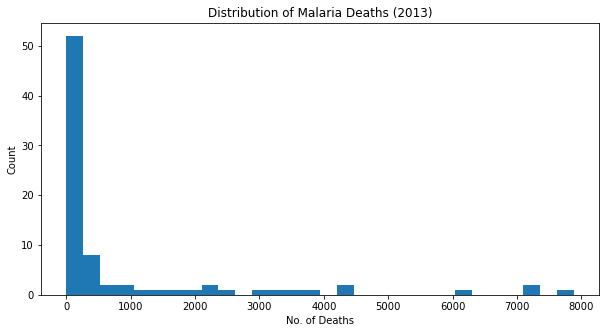

In [61]:
plt.hist(year_2013['Deaths'], bins=30)
plt.title('Distribution of Malaria Deaths (2013)')
plt.xlabel('No. of Deaths')
plt.ylabel('Count')
plt.show()

Similar to the distribution of incidence, most countries have really low death numbers but that other countries have a wide distribution regarding malaria deaths in 2013.

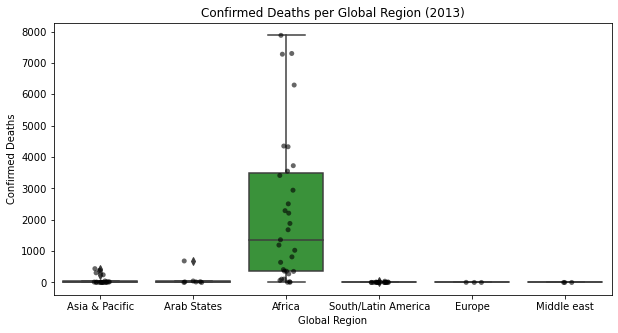

In [14]:
sns.boxplot(x='Region', y='Deaths', data=year_2013)
sns.stripplot(x='Region', y='Deaths', data=year_2013, color='black', alpha=0.6)
plt.title('Confirmed Deaths per Global Region (2013)')
plt.xlabel('Global Region')
plt.ylabel('Confirmed Deaths')
plt.show()

The graph shows that Africa has the highest number of deaths compared to the other regions. All other regions have very small number of deaths in 2013, but we thought that the inclusion of Africa might have skewed the other regions to Africa having more malaria deaths and more variations in its data.

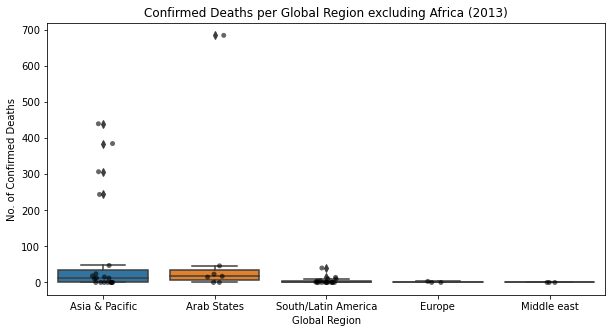

In [13]:
sns.boxplot(x='Region', y='Deaths', data=year_2013[year_2013['Region']!='Africa'])
sns.stripplot(x='Region', y='Deaths', data=year_2013[year_2013['Region']!='Africa'], color='black', alpha=0.6)
plt.title('Confirmed Deaths per Global Region excluding Africa (2013)')
plt.xlabel('Global Region')
plt.ylabel('No. of Confirmed Deaths')
plt.show()

We see that the malaria deaths in Arab States and Asia & Pacific are about the same. However, there are more Asia & Pacific countries that have significantly higher number of deaths. Nonetheless, one country in the Arab States had the highest number of confirmed deaths. There seems to be one outlier in South/Latin America when it comes to confirmed deaths.

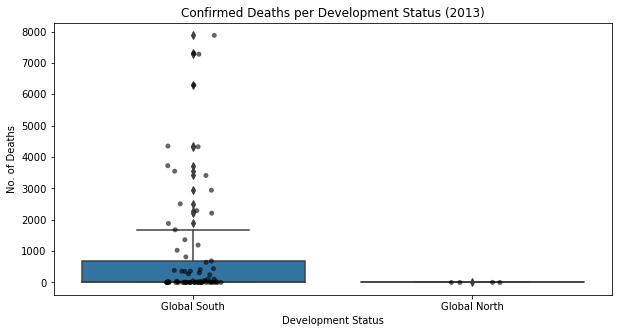

In [16]:
sns.boxplot(x='Global South', y='Deaths', data=year_2013)
sns.stripplot(x='Global South', y='Deaths', data=year_2013, color='black', alpha=0.6)
plt.title('Confirmed Deaths per Development Status (2013)')
plt.xlabel('Development Status')
plt.ylabel('No. of Deaths')
plt.show()

Similar to trends in incidence, more deaths occured in the Global South compared to the Global North. There were a lot of outliers in the Global South, however. 

### Analysis 1: Multivariable Regression of Temperature, GDP and Malaria Incidence

In [10]:
#Generating dummy variables for regions
subset_2013 = malaria_df.loc["2013-01-01"].copy()
subset_2013["Is Asia & Pacific"] = pd.get_dummies(subset_2013["Region"])["Asia & Pacific"]
subset_2013["Is Arab States"] = pd.get_dummies(subset_2013["Region"])["Arab States"]
subset_2013["Is Africa"] = pd.get_dummies(subset_2013["Region"])["Africa"]
subset_2013["Is South/Latin America"] = pd.get_dummies(subset_2013["Region"])["South/Latin America"]
subset_2013["Is Europe"] = pd.get_dummies(subset_2013["Region"])["Europe"]
subset_2013["Is Middle east"] = pd.get_dummies(subset_2013["Region"])["Middle east"]

##### Our multivariate linear regression model

In [11]:
incidence_model_vars = ["Is Asia & Pacific", "Is Arab States", "Is Africa",
                        "Is South/Latin America", "Is Europe", "Is Middle east",
                        "AverageTemperature", "GDPpcPPP"]

subset_2013 = subset_2013.dropna(subset = incidence_model_vars).copy() # making sure there are no NA values

incidence_model_2013 = LinearRegression()
incidence_model_2013.fit(subset_2013[incidence_model_vars], subset_2013["Incidence"])
incidence_model_2013_coeff = incidence_model_2013.coef_[:]

In [12]:
for i in range(len(incidence_model_2013_coeff)):
    print('For', incidence_model_vars[i], 'variable, the regression coefficient is: {:.2f}'.format(incidence_model_2013_coeff[i]))

For Is Asia & Pacific variable, the regression coefficient is: -26.35
For Is Arab States variable, the regression coefficient is: -68.27
For Is Africa variable, the regression coefficient is: 167.87
For Is South/Latin America variable, the regression coefficient is: -61.45
For Is Europe variable, the regression coefficient is: 35.38
For Is Middle east variable, the regression coefficient is: -47.18
For AverageTemperature variable, the regression coefficient is: 7.89
For GDPpcPPP variable, the regression coefficient is: -0.00


##### Using pooled data rather than just the 2013 year.

In [14]:
malaria_df_dropna = malaria_df.copy()
malaria_df_dropna["Is Asia & Pacific"] = pd.get_dummies(malaria_df_dropna["Region"])["Asia & Pacific"]
malaria_df_dropna["Is Arab States"] = pd.get_dummies(malaria_df_dropna["Region"])["Arab States"]
malaria_df_dropna["Is Africa"] = pd.get_dummies(malaria_df_dropna["Region"])["Africa"]
malaria_df_dropna["Is South/Latin America"] = pd.get_dummies(malaria_df_dropna["Region"])["South/Latin America"]
malaria_df_dropna["Is Europe"] = pd.get_dummies(malaria_df_dropna["Region"])["Europe"]
malaria_df_dropna["Is Middle east"] = pd.get_dummies(malaria_df_dropna["Region"])["Middle east"]
malaria_df_dropna = malaria_df_dropna.dropna(subset=incidence_model_vars).copy() # making sure there are no NA values

incidence_model_pooled = LinearRegression()
incidence_model_pooled.fit(malaria_df_dropna[incidence_model_vars], malaria_df_dropna["Incidence"])
incidence_model_pooled_coeff = incidence_model_pooled.coef_[:]

In [15]:
for i in range(len(incidence_model_pooled_coeff)):
    print('For', incidence_model_vars[i], 'variable, the regression coefficient is: {:.2f}'.format(incidence_model_pooled_coeff[i]))

For Is Asia & Pacific variable, the regression coefficient is: -24.84
For Is Arab States variable, the regression coefficient is: -69.34
For Is Africa variable, the regression coefficient is: 168.21
For Is South/Latin America variable, the regression coefficient is: -74.09
For Is Europe variable, the regression coefficient is: 26.72
For Is Middle east variable, the regression coefficient is: -26.67
For AverageTemperature variable, the regression coefficient is: 8.26
For GDPpcPPP variable, the regression coefficient is: -0.00


## Evaluation of Significance

##### Differences in malaria incidence per world region

##### Differences in malaria incidence per world region excluding Africa

##### Differences in GDP per Capita per world region

## Interpretation and Conclusions

## Limitations

## Source Code

## Acknowledgements

## Appendix: Data Cleaning Description

Datasets and codebooks are available [here](https://github.com/mcuadera/info_2950_malaria_project).

## Questions for Reviewers